## Example COVID 19 In Myanmar
ระหว่างเดินทางมาทำงาน ผมก็ได้รับสายจาก อาจารย์ต้อม เพื่อให้ทำการ Predict จำนวนผู้ติดเชื่อในพม่า อ ต้อม ก็ส่ง Line มาให้ ผมตามรูปนี้ 
พอมาถึง office ก็ไม่รอช้าดำเนินการใช้ Linear regression ที่พึ่งสอนไปพร้อมกับ วิธีอืนที่เป็นที่นิยมเช่น Polynomial และ Exponential ดังที่ได้เสนอยู่ในตัวอย่างนี้ ด้านล่างนี้ 

Reference Model 
https://learningcovid.ku.ac.th/course/?c=6&l=3


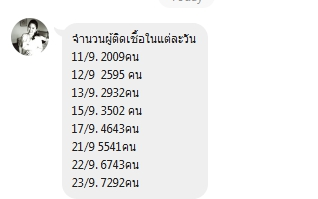

ล่าสุดต้องไปหาข้อมูลมาทำเองแล้ว

https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Myanmar#August



## Regression <a class="anchor" id="sec_4"></a>
### เพิ่มเติม
การคำนวณ Linear Regression Model ยังสามารถทำได้โดยการวิเคราะห์ด้วย Matrix โดยไม่จำเป็นต้องใช้การวิเคราะห์เป็น Least Mean Square และแคลคูลัส โดยการวิเคราะห์ทาง Matrix เราจะได้ความสัมพันธ์ว่า 
$$
b = (X'X)^{−1} X'Y
$$
เมื่อ <br>
$b = \left[\begin{matrix} \beta_0 \\ \beta_1 \end{matrix} \right]$ <br>

$X =
\left[\begin{matrix} 1 & x^{<1>} \\ 1 & x^{<2>} \\ \vdots & \vdots \\ 1 & x^{<\text{m}>} \end{matrix} \right]
$
Matrix ของ input ที่มีการเพิ่มค่า 1 ที่ใช้เป็นตัวคูณกับ bias <br>
$Y =
\left[\begin{matrix} y^{<1>} \\ y^{<2>} \\ \vdots \\ y^{<\text{m}>} \end{matrix} \right]
$
Vector ของ output <br>

สามารถดูรายละเอียดได้ที่ https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf



เนื่องจาก MATLAB/Octave ถูกออกแบบมาเพื่อ Matrix โดยเฉพาะ ดังนั้นจึง operator " \ " (x = A\B solves the system of linear equations Ax= B) ที่ใช้แทน $b = (X'X)^{−1} X'Y = X \backslash Y$

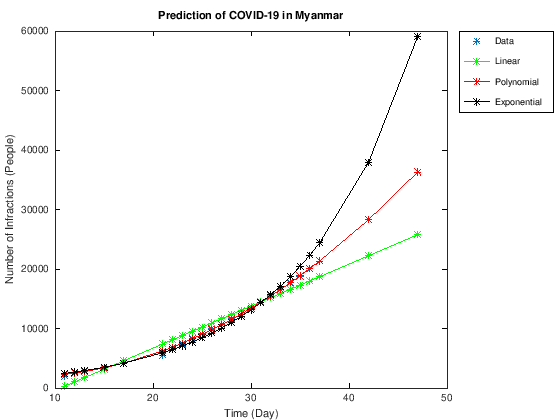

In [8]:
clear all;
hold off

Y= [2009; 2595; 2932; 3502; 4643; 5541; 6743; 7292; 8344; 9112; 9991; 10734; 11631; 12425; 13373; 14383; 15525; 16503; 17794; 18781; 20033 ];
X = [11; 12; 13; 15; 17; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36] ;
Xp2 = X.^2;
## logY= logA + Bx
## logA = b0
## B = b1
## Y = exp(b0 + b1*X)
LogY = log(Y);
% f = figure;
% grid on
plot(X,Y,'*');
hold on
X1 = [ones(length(X),1) X];
X2 = [ones(length(X),1) X Xp2];
b =  X1\Y;
b2 = X2\Y;
logB =X1\LogY;

SixMonth = [37:5: 50]';
Xf = [11; 12; 13; 15; 17; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36];
Xf = [Xf;SixMonth];
Xfp2 = Xf.^2;
%figure
Ylinear = b(1)+(b(2)*Xf);
plot(Xf,Ylinear,'-*g');
%figure
Ypoly = b2(1)+(b2(2)*Xf) +(b2(3)*Xfp2);
plot(Xf,Ypoly,'-*r');
%figure
Yexpo = exp(logB(1) + logB(2)*Xf);
plot(Xf, Yexpo,'-*k');
h = legend('Data','Linear', 'Polynomial', 'Exponential');
%h = legend('Data','Linear', 'Polynomial');
legend (h, "location", "northeastoutside");
hold off
xlabel('Time (Day)')
ylabel('Number of Infractions (People)')
title('Prediction of COVID-19 in Myanmar')

In [9]:
X = 40
printf( "Prediction by Polynomial  Model Day %d: %.0f\n", X, b2(1)+(b2(2)*X) +(b2(3)*X^2))
printf( "Prediction by Exponential Model of Day %d: %.0f\n ", X, exp(logB(1) + logB(2)*X))

X =  40


Prediction by Polynomial  Model Day 40: 25383


Prediction by Exponential Model of Day 40: 31799
 

In [20]:
residualLinear = sqrt(mean((Y-Ylinear(1:length(Y),1)).^2))
residualPoly = sqrt(mean((Y-Ypoly(1:length(Y),1)).^2))
residualExpo= sqrt(mean((Y-Yexpo(1:length(Y),1)).^2))

residualLinear =  1156.7


residualPoly =  224.17


residualExpo =  768.79
